# Loan Status Prediction

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

Importing Required Modules

In [2]:
ln=pd.read_csv("loan.csv")

Importing dataset

In [3]:
ln.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Sample of dataset

As we want to predict the loan status approved or reject so we want to build a classification model

In [4]:
ln.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

dataset have float,categorical and int datatypes

In [5]:
ln.shape

(614, 13)

Dataset have 614 rows and 13 columns

In [6]:
ln.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Dataset have some missing values we want to treat it

In [7]:
ln.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Unique values of each columns

In [8]:
ln.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here maximum income of applicant is 81000 and also the count loan amount,term and credit history is difference so there is some missing data in that columns

# Treating Missing values

In [9]:
ln=ln.dropna()

Here the missing values are low so I am dropping the missing values from dataset

In [10]:
ln.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we have no missing values in dataset

# Visualizations

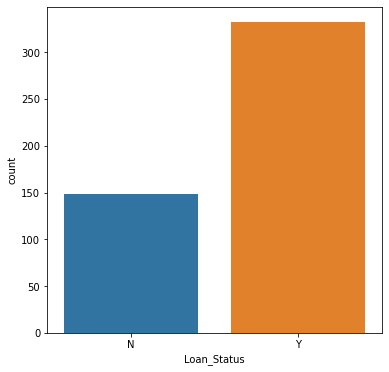

Y    332
N    148
Name: Loan_Status, dtype: int64


In [11]:
plt.figure(figsize=(6,6))
sns.countplot('Loan_Status',data=ln)
plt.show()
print(ln['Loan_Status'].value_counts())

Most of the loans were approved and also the we can observe the imbalance of the class

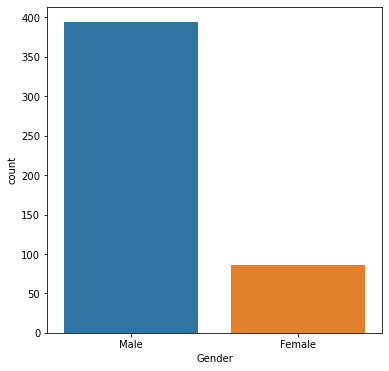

Male      394
Female     86
Name: Gender, dtype: int64


In [12]:
plt.figure(figsize=(6,6))
sns.countplot('Gender',data=ln)
plt.show()
print(ln['Gender'].value_counts())

Most of applicants are male

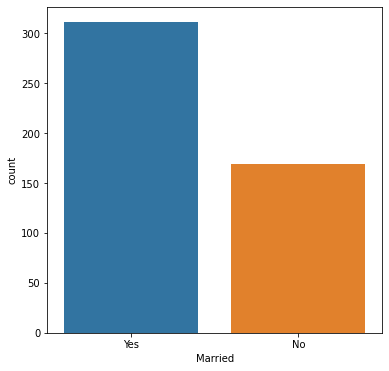

Yes    311
No     169
Name: Married, dtype: int64


In [13]:
plt.figure(figsize=(6,6))
sns.countplot('Married',data=ln)
plt.show()
print(ln['Married'].value_counts())

Most of applicants were married

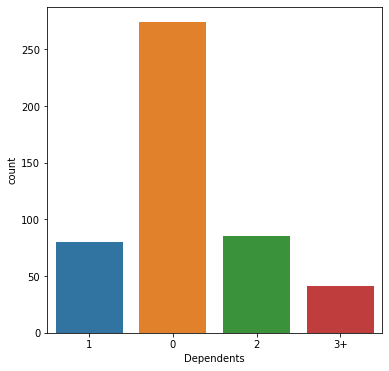

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64


In [14]:
plt.figure(figsize=(6,6))
sns.countplot('Dependents',data=ln)
plt.show()
print(ln['Dependents'].value_counts())

Most of the applicants are not dependent

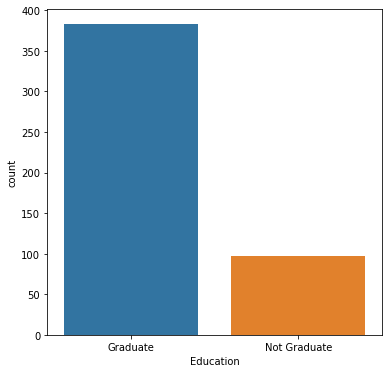

Graduate        383
Not Graduate     97
Name: Education, dtype: int64


In [15]:
plt.figure(figsize=(6,6))
sns.countplot('Education',data=ln)
plt.show()
print(ln['Education'].value_counts())

Most of the applicants where graduated

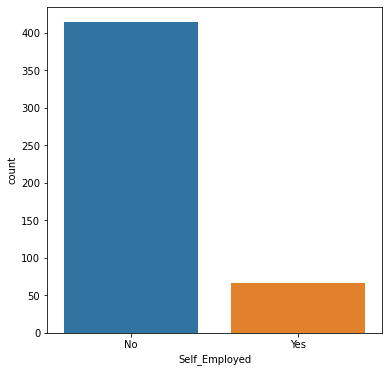

No     414
Yes     66
Name: Self_Employed, dtype: int64


In [16]:
plt.figure(figsize=(6,6))
sns.countplot('Self_Employed',data=ln)
plt.show()
print(ln['Self_Employed'].value_counts())

Most applicants are not self employed

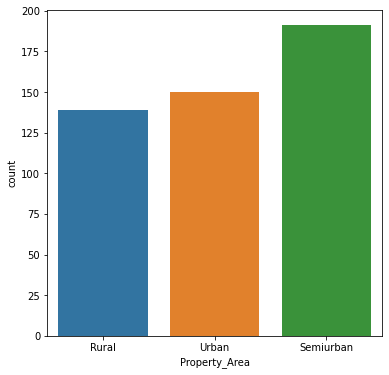

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64


In [17]:
plt.figure(figsize=(6,6))
sns.countplot('Property_Area',data=ln)
plt.show()
print(ln['Property_Area'].value_counts())

Most of the applicants property is from semiurban area

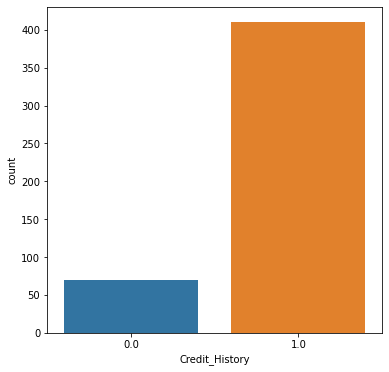

1.0    410
0.0     70
Name: Credit_History, dtype: int64


In [18]:
plt.figure(figsize=(6,6))
sns.countplot('Credit_History',data=ln)
plt.show()
print(ln['Credit_History'].value_counts())

Here 0 means is the applicants where not cleared their last loan or any debts 1 means applicants cleared.Here most of applicants were cleared.

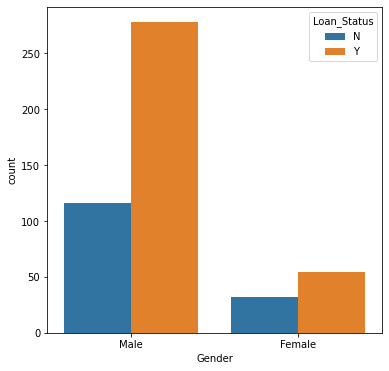

In [19]:
plt.figure(figsize=(6,6))
sns.countplot('Gender',hue='Loan_Status',data=ln)
plt.show()

Most of loans were approved for males

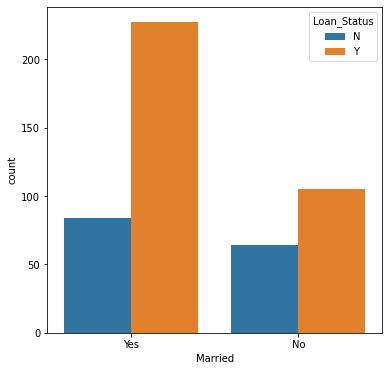

In [20]:
plt.figure(figsize=(6,6))
sns.countplot('Married',hue='Loan_Status',data=ln)
plt.show()

Loan is approved for married applicants 

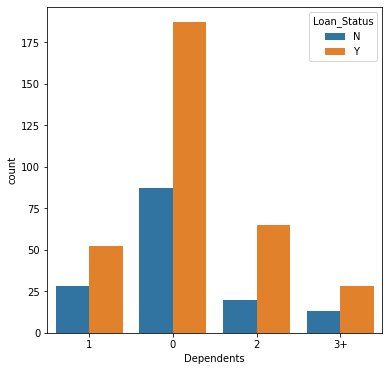

In [21]:
plt.figure(figsize=(6,6))
sns.countplot('Dependents',hue='Loan_Status',data=ln)
plt.show()

Most of the loans where approved for applicants not having dependents

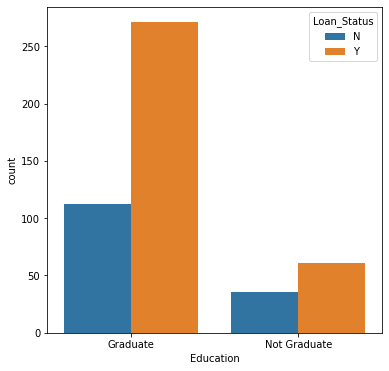

In [22]:
plt.figure(figsize=(6,6))
sns.countplot('Education',hue='Loan_Status',data=ln)
plt.show()

Mostly loans approved for graduated applicants

In [23]:
ln.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

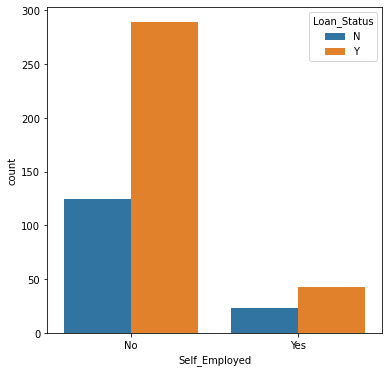

In [24]:
plt.figure(figsize=(6,6))
sns.countplot('Self_Employed',hue='Loan_Status',data=ln)
plt.show()

Most of the loans where approved fornot self employed applicants

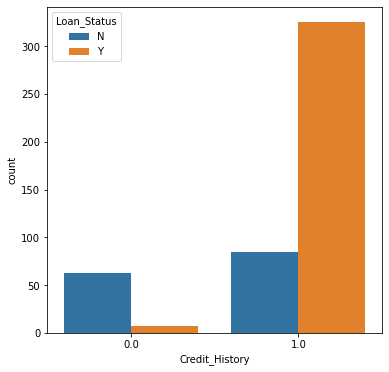

In [25]:
plt.figure(figsize=(6,6))
sns.countplot('Credit_History',hue='Loan_Status',data=ln)
plt.show()

Most loans approved for the applicants cleared past credit history

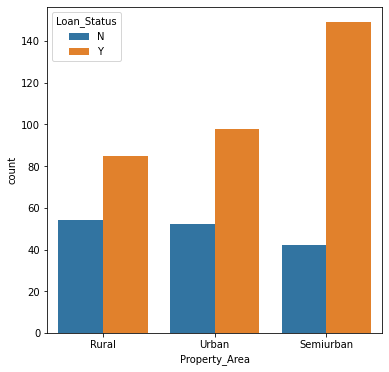

In [26]:
plt.figure(figsize=(6,6))
sns.countplot('Property_Area',hue='Loan_Status',data=ln)
plt.show()

Most of loans were approved for semi urban properties

# Data Cleaning

In [27]:
ln['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

Here we can see 3+ which is get confused while prediction let's change it

In [28]:
ln=ln.replace(to_replace='3+',value=4)

Replaced 3+ to 4 using replace function

In [29]:
ln['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

we can observe we replaced it

# Encoding

In [30]:
ln.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [31]:
le=LabelEncoder()
var=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
#storing column names to encode

for i in var:
    ln[i]=le.fit_transform(ln[i])

Encoded categorical table using label encoding

In [32]:
ln.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


Dataset after encoding

In [33]:
ln.drop(['Loan_ID'],axis=1,inplace=True)

Loan Id is not need for prediction So I drop it

# Seperating features And Target

In [34]:
x=ln.drop('Loan_Status', axis = 1)
y = ln['Loan_Status']

Seperated features and target

In [35]:
x.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2


Sample data of features

In [36]:
pd.DataFrame(y.head())

,Loan_Status
1,0
2,1
3,1
4,1
5,1


Sample data of target

# Scaling

In [37]:
sc=StandardScaler()
x=sc.fit_transform(x)

Scaled features of dataset

# Balancing Target Variable

# OverSampling

In [38]:
y.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

Imbalance 

In [39]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

Balanced using smote technique

In [40]:
y.value_counts()

0    332
1    332
Name: Loan_Status, dtype: int64

Balanced

# Model Building

In [42]:
#logistic regression
lr=LogisticRegression()
l=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        l.append(i)

At random state 0,the training accuarcy is:- 0.7152428810720268
At random state 0,the testing accuracy is:- 0.746268656716418


At random state 1,the training accuarcy is:- 0.7169179229480737
At random state 1,the testing accuracy is:- 0.6716417910447762


At random state 2,the training accuarcy is:- 0.7135678391959799
At random state 2,the testing accuracy is:- 0.7313432835820896


At random state 3,the training accuarcy is:- 0.7135678391959799
At random state 3,the testing accuracy is:- 0.6865671641791045


At random state 4,the training accuarcy is:- 0.7135678391959799
At random state 4,the testing accuracy is:- 0.7164179104477612


At random state 5,the training accuarcy is:- 0.7202680067001676
At random state 5,the testing accuracy is:- 0.6268656716417911


At random state 6,the training accuarcy is:- 0.7152428810720268
At random state 6,the testing accuracy is:- 0.7611940298507462


At random state 7,the training accuarcy is:- 0.7185929648241206
At random state 7,the testing accu

At random state 67,the training accuarcy is:- 0.7102177554438861
At random state 67,the testing accuracy is:- 0.6567164179104478


At random state 68,the training accuarcy is:- 0.7102177554438861
At random state 68,the testing accuracy is:- 0.6716417910447762


At random state 69,the training accuarcy is:- 0.7219430485762144
At random state 69,the testing accuracy is:- 0.6716417910447762


At random state 70,the training accuarcy is:- 0.7102177554438861
At random state 70,the testing accuracy is:- 0.6567164179104478


At random state 71,the training accuarcy is:- 0.7236180904522613
At random state 71,the testing accuracy is:- 0.6417910447761194


At random state 72,the training accuarcy is:- 0.7018425460636516
At random state 72,the testing accuracy is:- 0.7164179104477612


At random state 73,the training accuarcy is:- 0.7152428810720268
At random state 73,the testing accuracy is:- 0.6716417910447762


At random state 74,the training accuarcy is:- 0.7269681742043551
At random state 74

At random state 134,the training accuarcy is:- 0.6968174204355109
At random state 134,the testing accuracy is:- 0.6716417910447762


At random state 135,the training accuarcy is:- 0.7252931323283082
At random state 135,the testing accuracy is:- 0.6567164179104478


At random state 136,the training accuarcy is:- 0.711892797319933
At random state 136,the testing accuracy is:- 0.7014925373134329


At random state 137,the training accuarcy is:- 0.7102177554438861
At random state 137,the testing accuracy is:- 0.6567164179104478


At random state 138,the training accuarcy is:- 0.7269681742043551
At random state 138,the testing accuracy is:- 0.6417910447761194


At random state 139,the training accuarcy is:- 0.7202680067001676
At random state 139,the testing accuracy is:- 0.7611940298507462


At random state 140,the training accuarcy is:- 0.7152428810720268
At random state 140,the testing accuracy is:- 0.6567164179104478


At random state 141,the training accuarcy is:- 0.7051926298157454
At r

At random state 198,the testing accuracy is:- 0.7164179104477612


At random state 199,the training accuarcy is:- 0.7185929648241206
At random state 199,the testing accuracy is:- 0.7164179104477612


At random state 199 model performs well


Splitting into trained and test data,finding best random states

In [43]:
l

[31, 48, 84, 146, 199]

List best rendom states

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=199)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
acc_l=classification_report(y_test,predlr)
print(acc_l)
print(confusion_matrix(y_test,predlr))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65        32
           1       0.68      0.86      0.76        35

    accuracy                           0.72        67
   macro avg       0.73      0.71      0.71        67
weighted avg       0.73      0.72      0.71        67

[[18 14]
 [ 5 30]]


Apply best random state and find accuracy, confusion Matrix of logistic regression

In [46]:
dt=DecisionTreeClassifier()
d=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        d.append(i)

At random state 0,the training accuarcy is:- 1.0
At random state 0,the testing accuracy is:- 0.7611940298507462


At random state 1,the training accuarcy is:- 1.0
At random state 1,the testing accuracy is:- 0.8805970149253731


At random state 2,the training accuarcy is:- 1.0
At random state 2,the testing accuracy is:- 0.7910447761194029


At random state 3,the training accuarcy is:- 1.0
At random state 3,the testing accuracy is:- 0.7014925373134329


At random state 4,the training accuarcy is:- 1.0
At random state 4,the testing accuracy is:- 0.7611940298507462


At random state 5,the training accuarcy is:- 1.0
At random state 5,the testing accuracy is:- 0.6716417910447762


At random state 6,the training accuarcy is:- 1.0
At random state 6,the testing accuracy is:- 0.8059701492537313


At random state 7,the training accuarcy is:- 1.0
At random state 7,the testing accuracy is:- 0.7014925373134329


At random state 8,the training accuarcy is:- 1.0
At random state 8,the testing accuracy 

At random state 79,the testing accuracy is:- 0.835820895522388


At random state 80,the training accuarcy is:- 1.0
At random state 80,the testing accuracy is:- 0.7164179104477612


At random state 81,the training accuarcy is:- 1.0
At random state 81,the testing accuracy is:- 0.8208955223880597


At random state 82,the training accuarcy is:- 1.0
At random state 82,the testing accuracy is:- 0.6865671641791045


At random state 83,the training accuarcy is:- 1.0
At random state 83,the testing accuracy is:- 0.746268656716418


At random state 84,the training accuarcy is:- 1.0
At random state 84,the testing accuracy is:- 0.7611940298507462


At random state 85,the training accuarcy is:- 1.0
At random state 85,the testing accuracy is:- 0.835820895522388


At random state 86,the training accuarcy is:- 1.0
At random state 86,the testing accuracy is:- 0.7611940298507462


At random state 87,the training accuarcy is:- 1.0
At random state 87,the testing accuracy is:- 0.7164179104477612


At random

At random state 157,the testing accuracy is:- 0.7910447761194029


At random state 158,the training accuarcy is:- 1.0
At random state 158,the testing accuracy is:- 0.8059701492537313


At random state 159,the training accuarcy is:- 1.0
At random state 159,the testing accuracy is:- 0.835820895522388


At random state 160,the training accuarcy is:- 1.0
At random state 160,the testing accuracy is:- 0.6417910447761194


At random state 161,the training accuarcy is:- 1.0
At random state 161,the testing accuracy is:- 0.8059701492537313


At random state 162,the training accuarcy is:- 1.0
At random state 162,the testing accuracy is:- 0.7014925373134329


At random state 163,the training accuarcy is:- 1.0
At random state 163,the testing accuracy is:- 0.7761194029850746


At random state 164,the training accuarcy is:- 1.0
At random state 164,the testing accuracy is:- 0.7313432835820896


At random state 165,the training accuarcy is:- 1.0
At random state 165,the testing accuracy is:- 0.716417910

Splitted into trained and test data ,finding best random states

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=113)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
acc_d=classification_report(y_test,preddt)
print(acc_d)
print(confusion_matrix(y_test,preddt))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85        36
           1       0.80      0.90      0.85        31

    accuracy                           0.85        67
   macro avg       0.85      0.85      0.85        67
weighted avg       0.86      0.85      0.85        67

[[29  7]
 [ 3 28]]


Apply best random state and find accuracy,confusion matrix for decision tree

In [51]:
#Kneighbors classifier 
kn=KNeighborsClassifier()
k=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        k.append(i)

At random state 0,the training accuarcy is:- 0.8324958123953099
At random state 0,the testing accuracy is:- 0.746268656716418


At random state 1,the training accuarcy is:- 0.830820770519263
At random state 1,the testing accuracy is:- 0.7611940298507462


At random state 2,the training accuarcy is:- 0.8324958123953099
At random state 2,the testing accuracy is:- 0.7761194029850746


At random state 3,the training accuarcy is:- 0.8274706867671692
At random state 3,the testing accuracy is:- 0.5970149253731343


At random state 4,the training accuarcy is:- 0.847571189279732
At random state 4,the testing accuracy is:- 0.7014925373134329


At random state 5,the training accuarcy is:- 0.8257956448911222
At random state 5,the testing accuracy is:- 0.746268656716418


At random state 6,the training accuarcy is:- 0.8291457286432161
At random state 6,the testing accuracy is:- 0.7164179104477612


At random state 7,the training accuarcy is:- 0.8291457286432161
At random state 7,the testing accurac

At random state 64,the training accuarcy is:- 0.8140703517587939
At random state 64,the testing accuracy is:- 0.746268656716418


At random state 65,the training accuarcy is:- 0.8375209380234506
At random state 65,the testing accuracy is:- 0.7164179104477612


At random state 66,the training accuarcy is:- 0.8341708542713567
At random state 66,the testing accuracy is:- 0.6417910447761194


At random state 67,the training accuarcy is:- 0.830820770519263
At random state 67,the testing accuracy is:- 0.7313432835820896


At random state 68,the training accuarcy is:- 0.8257956448911222
At random state 68,the testing accuracy is:- 0.7910447761194029


At random state 69,the training accuarcy is:- 0.8375209380234506
At random state 69,the testing accuracy is:- 0.7164179104477612


At random state 70,the training accuarcy is:- 0.8207705192629816
At random state 70,the testing accuracy is:- 0.7014925373134329


At random state 71,the training accuarcy is:- 0.8190954773869347
At random state 71,t

At random state 128,the training accuarcy is:- 0.8207705192629816
At random state 128,the testing accuracy is:- 0.7164179104477612


At random state 129,the training accuarcy is:- 0.8375209380234506
At random state 129,the testing accuracy is:- 0.6865671641791045


At random state 130,the training accuarcy is:- 0.8358458961474037
At random state 130,the testing accuracy is:- 0.7164179104477612


At random state 131,the training accuarcy is:- 0.830820770519263
At random state 131,the testing accuracy is:- 0.7611940298507462


At random state 132,the training accuarcy is:- 0.8291457286432161
At random state 132,the testing accuracy is:- 0.6119402985074627


At random state 133,the training accuarcy is:- 0.847571189279732
At random state 133,the testing accuracy is:- 0.6567164179104478


At random state 134,the training accuarcy is:- 0.8291457286432161
At random state 134,the testing accuracy is:- 0.7761194029850746


At random state 135,the training accuarcy is:- 0.8341708542713567
At ra

At random state 190,the testing accuracy is:- 0.6417910447761194


At random state 191,the training accuarcy is:- 0.8341708542713567
At random state 191,the testing accuracy is:- 0.6268656716417911


At random state 192,the training accuarcy is:- 0.8375209380234506
At random state 192,the testing accuracy is:- 0.5970149253731343


At random state 193,the training accuarcy is:- 0.8274706867671692
At random state 193,the testing accuracy is:- 0.6865671641791045


At random state 194,the training accuarcy is:- 0.8576214405360134
At random state 194,the testing accuracy is:- 0.6865671641791045


At random state 195,the training accuarcy is:- 0.8425460636515912
At random state 195,the testing accuracy is:- 0.7014925373134329


At random state 196,the training accuarcy is:- 0.8324958123953099
At random state 196,the testing accuracy is:- 0.6567164179104478


At random state 197,the training accuarcy is:- 0.8224455611390284
At random state 197,the testing accuracy is:- 0.7313432835820896


At

Splitted into trained and test data ,finding best random states

In [52]:
k

[58, 124, 152]

List of best random states

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=152)
kn.fit(x_train,y_train)
predknn=kn.predict(x_test)
acc_k=classification_report(y_test,predknn)
print(acc_k)
print(confusion_matrix(y_test,predknn))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.87      0.82      0.85        40

    accuracy                           0.82        67
   macro avg       0.81      0.82      0.82        67
weighted avg       0.82      0.82      0.82        67

[[22  5]
 [ 7 33]]


Applied best random states,find accuarcy score,confusion matrix for kneighbors

In [57]:
#Random Forest classifier 
rf=RandomForestClassifier()
r=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        r.append(i)

At random state 0,the training accuarcy is:- 1.0
At random state 0,the testing accuracy is:- 0.8656716417910447


At random state 1,the training accuarcy is:- 1.0
At random state 1,the testing accuracy is:- 0.9104477611940298


At random state 2,the training accuarcy is:- 1.0
At random state 2,the testing accuracy is:- 0.8955223880597015


At random state 3,the training accuarcy is:- 1.0
At random state 3,the testing accuracy is:- 0.7761194029850746


At random state 4,the training accuarcy is:- 1.0
At random state 4,the testing accuracy is:- 0.7910447761194029


At random state 5,the training accuarcy is:- 1.0
At random state 5,the testing accuracy is:- 0.8805970149253731


At random state 6,the training accuarcy is:- 1.0
At random state 6,the testing accuracy is:- 0.8656716417910447


At random state 7,the training accuarcy is:- 1.0
At random state 7,the testing accuracy is:- 0.835820895522388


At random state 8,the training accuarcy is:- 1.0
At random state 8,the testing accuracy i

At random state 71,the training accuarcy is:- 1.0
At random state 71,the testing accuracy is:- 0.835820895522388


At random state 72,the training accuarcy is:- 1.0
At random state 72,the testing accuracy is:- 0.8955223880597015


At random state 73,the training accuarcy is:- 1.0
At random state 73,the testing accuracy is:- 0.8059701492537313


At random state 74,the training accuarcy is:- 1.0
At random state 74,the testing accuracy is:- 0.7761194029850746


At random state 75,the training accuarcy is:- 1.0
At random state 75,the testing accuracy is:- 0.8507462686567164


At random state 76,the training accuarcy is:- 1.0
At random state 76,the testing accuracy is:- 0.9104477611940298


At random state 77,the training accuarcy is:- 1.0
At random state 77,the testing accuracy is:- 0.835820895522388


At random state 78,the training accuarcy is:- 1.0
At random state 78,the testing accuracy is:- 0.8059701492537313


At random state 79,the training accuarcy is:- 1.0
At random state 79,the t

At random state 141,the training accuarcy is:- 1.0
At random state 141,the testing accuracy is:- 0.8059701492537313


At random state 142,the training accuarcy is:- 1.0
At random state 142,the testing accuracy is:- 0.8507462686567164


At random state 143,the training accuarcy is:- 1.0
At random state 143,the testing accuracy is:- 0.8507462686567164


At random state 144,the training accuarcy is:- 1.0
At random state 144,the testing accuracy is:- 0.8208955223880597


At random state 145,the training accuarcy is:- 1.0
At random state 145,the testing accuracy is:- 0.8059701492537313


At random state 146,the training accuarcy is:- 1.0
At random state 146,the testing accuracy is:- 0.8656716417910447


At random state 147,the training accuarcy is:- 1.0
At random state 147,the testing accuracy is:- 0.835820895522388


At random state 148,the training accuarcy is:- 1.0
At random state 148,the testing accuracy is:- 0.8507462686567164


At random state 149,the training accuarcy is:- 1.0
At ran

Splitted data into trainedand test data,finding best random states

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=172)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
acc_r=classification_report(y_test,predrf)
print(acc_r)
print(confusion_matrix(y_test,predrf))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.94      0.87      0.90        38

    accuracy                           0.90        67
   macro avg       0.89      0.90      0.89        67
weighted avg       0.90      0.90      0.90        67

[[27  2]
 [ 5 33]]


Applied best parameters and find accuracy ,confusion matrix of random forest

In [62]:
#adaboostclassifier
ad=AdaBoostClassifier()
a=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    ad.fit(x_train,y_train)
    pred_train=ad.predict(x_train)
    pred_test=ad.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        a.append(i)

At random state 0,the training accuarcy is:- 0.8425460636515912
At random state 0,the testing accuracy is:- 0.835820895522388


At random state 0 model performs well
At random state 1,the training accuarcy is:- 0.8559463986599665
At random state 1,the testing accuracy is:- 0.7164179104477612


At random state 2,the training accuarcy is:- 0.8375209380234506
At random state 2,the testing accuracy is:- 0.7761194029850746


At random state 3,the training accuarcy is:- 0.8425460636515912
At random state 3,the testing accuracy is:- 0.6716417910447762


At random state 4,the training accuarcy is:- 0.8458961474036851
At random state 4,the testing accuracy is:- 0.6716417910447762


At random state 5,the training accuarcy is:- 0.8358458961474037
At random state 5,the testing accuracy is:- 0.7164179104477612


At random state 6,the training accuarcy is:- 0.8358458961474037
At random state 6,the testing accuracy is:- 0.7611940298507462


At random state 7,the training accuarcy is:- 0.8358458961474

At random state 63,the training accuarcy is:- 0.8492462311557789
At random state 63,the testing accuracy is:- 0.8059701492537313


At random state 64,the training accuarcy is:- 0.8257956448911222
At random state 64,the testing accuracy is:- 0.8059701492537313


At random state 65,the training accuarcy is:- 0.8341708542713567
At random state 65,the testing accuracy is:- 0.8059701492537313


At random state 66,the training accuarcy is:- 0.8391959798994975
At random state 66,the testing accuracy is:- 0.835820895522388


At random state 66 model performs well
At random state 67,the training accuarcy is:- 0.8442211055276382
At random state 67,the testing accuracy is:- 0.7164179104477612


At random state 68,the training accuarcy is:- 0.8408710217755444
At random state 68,the testing accuracy is:- 0.7313432835820896


At random state 69,the training accuarcy is:- 0.8408710217755444
At random state 69,the testing accuracy is:- 0.7611940298507462


At random state 70,the training accuarcy is:-

At random state 124,the testing accuracy is:- 0.7910447761194029


At random state 125,the training accuarcy is:- 0.8492462311557789
At random state 125,the testing accuracy is:- 0.7313432835820896


At random state 126,the training accuarcy is:- 0.8291457286432161
At random state 126,the testing accuracy is:- 0.835820895522388


At random state 127,the training accuarcy is:- 0.8358458961474037
At random state 127,the testing accuracy is:- 0.6417910447761194


At random state 128,the training accuarcy is:- 0.8408710217755444
At random state 128,the testing accuracy is:- 0.8059701492537313


At random state 129,the training accuarcy is:- 0.8257956448911222
At random state 129,the testing accuracy is:- 0.8507462686567164


At random state 130,the training accuarcy is:- 0.8509212730318257
At random state 130,the testing accuracy is:- 0.7313432835820896


At random state 131,the training accuarcy is:- 0.8492462311557789
At random state 131,the testing accuracy is:- 0.7910447761194029


At 

At random state 186,the training accuarcy is:- 0.8291457286432161
At random state 186,the testing accuracy is:- 0.7910447761194029


At random state 187,the training accuarcy is:- 0.8458961474036851
At random state 187,the testing accuracy is:- 0.7761194029850746


At random state 188,the training accuarcy is:- 0.8425460636515912
At random state 188,the testing accuracy is:- 0.7611940298507462


At random state 189,the training accuarcy is:- 0.8391959798994975
At random state 189,the testing accuracy is:- 0.746268656716418


At random state 190,the training accuarcy is:- 0.8492462311557789
At random state 190,the testing accuracy is:- 0.7611940298507462


At random state 191,the training accuarcy is:- 0.8341708542713567
At random state 191,the testing accuracy is:- 0.7164179104477612


At random state 192,the training accuarcy is:- 0.8458961474036851
At random state 192,the testing accuracy is:- 0.6865671641791045


At random state 193,the training accuarcy is:- 0.8425460636515912
At r

Splitted data into tained and test data,finding best random states

In [63]:
a

[0, 29, 66, 75, 106, 116, 173]

List f berst random states

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=173)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
acc_a=classification_report(y_test,predad)
print(acc_a)
print(confusion_matrix(y_test,predad))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.80      0.91      0.85        35

    accuracy                           0.84        67
   macro avg       0.84      0.83      0.83        67
weighted avg       0.84      0.84      0.83        67

[[24  8]
 [ 3 32]]


Applied best random state and find accuracy,confusion matrix for adaboost

In [68]:
#supportvectorclassifier
sv=SVC()
s=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    sv.fit(x_train,y_train)
    pred_train=sv.predict(x_train)
    pred_test=sv.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        s.append(i)

At random state 0,the training accuarcy is:- 0.7805695142378559
At random state 0,the testing accuracy is:- 0.746268656716418


At random state 1,the training accuarcy is:- 0.7772194304857621
At random state 1,the testing accuracy is:- 0.6716417910447762


At random state 2,the training accuarcy is:- 0.7671691792294807
At random state 2,the testing accuracy is:- 0.7313432835820896


At random state 3,the training accuarcy is:- 0.7822445561139029
At random state 3,the testing accuracy is:- 0.7164179104477612


At random state 4,the training accuarcy is:- 0.7755443886097152
At random state 4,the testing accuracy is:- 0.7313432835820896


At random state 5,the training accuarcy is:- 0.7772194304857621
At random state 5,the testing accuracy is:- 0.6567164179104478


At random state 6,the training accuarcy is:- 0.7571189279731994
At random state 6,the testing accuracy is:- 0.7910447761194029


At random state 7,the training accuarcy is:- 0.7604690117252931
At random state 7,the testing accu

At random state 63,the testing accuracy is:- 0.7611940298507462


At random state 64,the training accuarcy is:- 0.7738693467336684
At random state 64,the testing accuracy is:- 0.8059701492537313


At random state 65,the training accuarcy is:- 0.7822445561139029
At random state 65,the testing accuracy is:- 0.7014925373134329


At random state 66,the training accuarcy is:- 0.7805695142378559
At random state 66,the testing accuracy is:- 0.7761194029850746


At random state 66 model performs well
At random state 67,the training accuarcy is:- 0.7822445561139029
At random state 67,the testing accuracy is:- 0.7014925373134329


At random state 68,the training accuarcy is:- 0.7705192629815746
At random state 68,the testing accuracy is:- 0.746268656716418


At random state 69,the training accuarcy is:- 0.7906197654941374
At random state 69,the testing accuracy is:- 0.7014925373134329


At random state 70,the training accuarcy is:- 0.7738693467336684
At random state 70,the testing accuracy is:- 

At random state 126,the training accuarcy is:- 0.7805695142378559
At random state 126,the testing accuracy is:- 0.7761194029850746


At random state 126 model performs well
At random state 127,the training accuarcy is:- 0.7872696817420436
At random state 127,the testing accuracy is:- 0.6567164179104478


At random state 128,the training accuarcy is:- 0.7755443886097152
At random state 128,the testing accuracy is:- 0.835820895522388


At random state 129,the training accuarcy is:- 0.7688442211055276
At random state 129,the testing accuracy is:- 0.7611940298507462


At random state 130,the training accuarcy is:- 0.7788944723618091
At random state 130,the testing accuracy is:- 0.6716417910447762


At random state 131,the training accuarcy is:- 0.7738693467336684
At random state 131,the testing accuracy is:- 0.7910447761194029


At random state 132,the training accuarcy is:- 0.7671691792294807
At random state 132,the testing accuracy is:- 0.746268656716418


At random state 133,the trainin

At random state 187,the training accuarcy is:- 0.7788944723618091
At random state 187,the testing accuracy is:- 0.7313432835820896


At random state 188,the training accuarcy is:- 0.7755443886097152
At random state 188,the testing accuracy is:- 0.6865671641791045


At random state 189,the training accuarcy is:- 0.7805695142378559
At random state 189,the testing accuracy is:- 0.6716417910447762


At random state 190,the training accuarcy is:- 0.7621440536013401
At random state 190,the testing accuracy is:- 0.746268656716418


At random state 191,the training accuarcy is:- 0.7721943048576214
At random state 191,the testing accuracy is:- 0.7014925373134329


At random state 192,the training accuarcy is:- 0.7822445561139029
At random state 192,the testing accuracy is:- 0.582089552238806


At random state 193,the training accuarcy is:- 0.7654941373534339
At random state 193,the testing accuracy is:- 0.6716417910447762


At random state 194,the training accuarcy is:- 0.7939698492462312
At ra

Splitted data into trained and test data,finding best random state

In [69]:
s

[66, 126, 139, 148]

List of best random states

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=148)
sv.fit(x_train,y_train)
predsv=ad.predict(x_test)
acc_s=classification_report(y_test,predsv)
print(acc_s)
print(confusion_matrix(y_test,predsv))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.86      0.91      0.89        34

    accuracy                           0.88        67
   macro avg       0.88      0.88      0.88        67
weighted avg       0.88      0.88      0.88        67

[[28  5]
 [ 3 31]]


Applied best random state find accuracy,confusion matrix for support vector

# Cross Validation Score

In [71]:
print("CV score and it's mean of Logistic Regression:",cross_val_score(lr,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predlr))
print("CV score and it's mean of Decision Tree Classifier:",cross_val_score(dt,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,preddt))
print("CV score and it's mean of Kneighbors Classfier:",cross_val_score(kn,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predknn))
print("CV score and it's mean of Random Forest:",cross_val_score(rf,x,y,cv=8).mean(),"Accuarcy score:",accuracy_score(y_test,predrf))
print("CV score and it's mean of Adaboost classifier:",cross_val_score(ad,x,y,cv=8).mean(),"Accuarcy score:",accuracy_score(y_test,predad))
print("CV score and it's mean of Support vector classifier:",cross_val_score(sv,x,y,cv=8).mean(),"Accuarcy score:",accuracy_score(y_test,predsv))

CV score and it's mean of Logistic Regression: 0.6882530120481927 Accuracy score: 0.43283582089552236
CV score and it's mean of Decision Tree Classifier: 0.7801204819277108 Accuracy score: 0.44776119402985076
CV score and it's mean of Kneighbors Classfier: 0.7274096385542168 Accuracy score: 0.4925373134328358
CV score and it's mean of Random Forest: 0.8253012048192772 Accuarcy score: 0.5373134328358209
CV score and it's mean of Adaboost classifier: 0.7484939759036144 Accuarcy score: 0.5223880597014925
CV score and it's mean of Support vector classifier: 0.713855421686747 Accuarcy score: 0.8805970149253731


Here cv score and accuracy score of support vector have least difference so I proceed with support vector

# Hyper Parameter Tuning

In [88]:
parameters={'kernel':['linear','poly','rbf'],'C':[0.1,1,10],'gamma':[1,0.1,0.01],'tol':[1e-1,1e-2,1e-3]}

Stored parameters in variable

In [89]:
gcsv=GridSearchCV(sv,parameters,cv=8)

Instanciate gridsearch cv give cv score=8

In [90]:
gcsv.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'tol': [0.1, 0.01, 0.001]})

Fitted data

In [91]:
gcsv.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf', 'tol': 0.01}

Best parameters after tuning

In [92]:
best=SVC(C=10,gamma=1,kernel='rbf',tol=0.01)
best.fit(x_train,y_train)
predbest=best.predict(x_test)
acc_b=(accuracy_score(y_test,predbest))
print(acc_b*100)

79.1044776119403


applied best parametrs and find accuracy for Support ector

In svc when probability is false we can't assign pred_proba for auc curve

# Saving Model

In [96]:
import joblib as jb
jb.dump(best,"Best_Status.pkl")

['Best_Status.pkl']

Model saved

# Conclusion

In [97]:
a=np.array(y_test)
predicted=np.array(best.predict(x_test))
Loan=pd.DataFrame({"Original:":a,"Predicted":predicted},index=range(len(a)))
Loan

,Original:,Predicted
0,0,0
1,1,0
2,1,1
3,1,1
4,1,1
...,...,...
62,1,1
63,0,0
64,1,1
65,0,0


Original and predicted values